In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_trial_data_to_load_df, 
                            mouse_drug_data_to_load_df, 
                            on="Mouse ID", how="left")

print(f"length of mouse data = {len(mouse_drug_data_to_load_df)}")
print(f"length of trial data = {len(clinical_trial_data_to_load_df)}")
print(f"length of join = {len(combined_data_df)}")


# ----------------------------------------------------------------------------------------
# Data wrangling is required because merging the two data frames 
# produced extra rows. The culprit is found to be duplicates in 
# mouse_drug_data.csv.
# ----------------------------------------------------------------------------------------
mouse_drug_data_to_load_reduced_df = \
    mouse_drug_data_to_load_df.drop_duplicates("Mouse ID")


# Combine the data into a single dataset, again, with the reduced 
# mouse drug data
combined_data_reduced_df = pd.merge(clinical_trial_data_to_load_df, 
                                    mouse_drug_data_to_load_reduced_df, 
                                    on="Mouse ID", how="left")
print()
print("  -- After data wrangling --")
print(f"length of mouse data with duplicates = \
    {len(mouse_drug_data_to_load_df)}")
print(f"length of mouse data after reduction  = \
    {len(mouse_drug_data_to_load_reduced_df)}")
print(f"length of trial data = \
    {len(clinical_trial_data_to_load_df)}")
print(f"length of join = {len(combined_data_reduced_df)}")

# copy to a new data frame and get columns list
trial_data_df = combined_data_reduced_df.copy()
trial_data_columns = trial_data_df.columns

# Display the data table for preview
print()
print(f"Columns of the trial data are {trial_data_columns}")
trial_data_df.head()

length of mouse data = 250
length of trial data = 1893
length of join = 1906

  -- After data wrangling --
length of mouse data with duplicates =     250
length of mouse data after reduction  =     249
length of trial data =     1893
length of join = 1893

Columns of the trial data are Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_drug_timepoint_group = trial_data_df.groupby(['Drug', 'Timepoint'])
tumor_vol_mean = tumor_drug_timepoint_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_vol_mean_df = tumor_vol_mean.to_frame().reset_index()

# Preview DataFrame
tumor_vol_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_std_err = tumor_drug_timepoint_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_vol_std_err_df = tumor_vol_std_err.to_frame().reset_index()

# Preview DataFrame
tumor_vol_std_err_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_df_pivot = pd.pivot_table(tumor_vol_mean_df, 
                                         index=["Timepoint"],
                                         columns=["Drug"])

# Preview that Reformatting worked
tumor_vol_mean_df_pivot.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.168130  43.944859  47.527452  46.851818  
10         49.423329  48.938560  42.531957  49.463844  48.689881  
15         51.359742  50.891769  41.495061  51.529409  50.779059  
20         54.364417  53.127384  40.238325  54.067395  53.170334

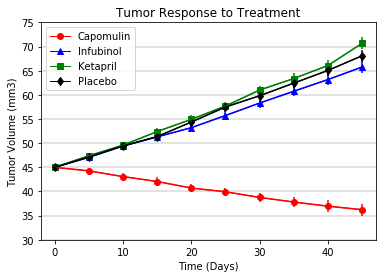

In [5]:
# Generate the Plot (with Error Bars)
# drugs of interest are Capomulin Infubinol Ketapril Placebo
x_axis = np.arange(0,46,5)
Capomulin_vol_axis = tumor_vol_mean_df_pivot['Tumor Volume (mm3)',
                                             "Capomulin"].values
Infubinol_vol_axis = tumor_vol_mean_df_pivot['Tumor Volume (mm3)',
                                             "Infubinol"].values
Ketapril_vol_axis = tumor_vol_mean_df_pivot['Tumor Volume (mm3)',
                                            "Ketapril"].values
Placebo_vol_axis = tumor_vol_mean_df_pivot['Tumor Volume (mm3)',
                                           "Placebo"].values

Capomulin_vol_handle, = plt.plot(x_axis, Capomulin_vol_axis, 
                                 marker="o",color="red", linewidth=1, 
                                 label="Capomulin")
Infubinol_vol_handle, = plt.plot(x_axis, Infubinol_vol_axis, 
                                 marker="^",color="blue", linewidth=1, 
                                 label="Infubinol")
Ketapril_vol_handle, = plt.plot(x_axis, Ketapril_vol_axis, 
                                marker="s",color="green", linewidth=1, 
                                label="Ketapril")
Placebo_vol_handle, = plt.plot(x_axis, Placebo_vol_axis, 
                               marker="d",color="black", linewidth=1, 
                               label="Placebo")

tumor_vol_std_err_df_pivot = pd.pivot_table(tumor_vol_std_err_df, 
                                           index=["Timepoint"], 
                                            columns=["Drug"])
Capomulin_vol_std_err = \
    tumor_vol_std_err_df_pivot['Tumor Volume (mm3)',"Capomulin"].values
Infubinol_vol_std_err = \
    tumor_vol_std_err_df_pivot['Tumor Volume (mm3)',"Capomulin"].values
Ketapril_vol_std_err = \
    tumor_vol_std_err_df_pivot['Tumor Volume (mm3)',"Capomulin"].values
Placebo_vol_std_err = \
    tumor_vol_std_err_df_pivot['Tumor Volume (mm3)',"Capomulin"].values

plt.errorbar(x_axis, Capomulin_vol_axis, Capomulin_vol_std_err, 
             color="red")
plt.errorbar(x_axis, Infubinol_vol_axis, Infubinol_vol_std_err, 
             color="blue")
plt.errorbar(x_axis, Ketapril_vol_axis, Ketapril_vol_std_err, 
             color="green")
plt.errorbar(x_axis, Placebo_vol_axis, Placebo_vol_std_err, 
             color="black")

plt.xlim(-2, 47)
plt.ylim(30, 75)

hlines_step = np.arange(30, 75, 5)
plt.hlines(hlines_step, -2, 50, alpha=0.15)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[Capomulin_vol_handle, Infubinol_vol_handle, 
                    Ketapril_vol_handle, Placebo_vol_handle], loc="best")

# Save the Figure
plt.savefig("images/Tumor Response to Treatment.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_sites_mean = tumor_drug_timepoint_group['Metastatic Sites'].mean()

# Convert to DataFrame
# omitting .reset_index() to comply with starter
tumor_sites_mean_df = tumor_sites_mean.to_frame()  

# Preview DataFrame
tumor_sites_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by 
# Drug and Timepoint 
tumor_sites_std_err = tumor_drug_timepoint_group['Metastatic Sites'].sem()

# Convert to DataFrame
# omitting .reset_index() to comply with starter
tumor_sites_std_err_df = tumor_sites_std_err.to_frame()

# Preview DataFrame
tumor_sites_std_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sites_mean_df_pivot = pd.pivot_table(tumor_sites_mean_df, 
                                           index=["Timepoint"], 
                                           columns=["Drug"])

# Preview that Reformatting worked
tumor_sites_mean_df_pivot.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.347826  0.120000  0.240000  0.166667  
10         0.619048  0.250000  0.478261  0.500000  
15         0.800000  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

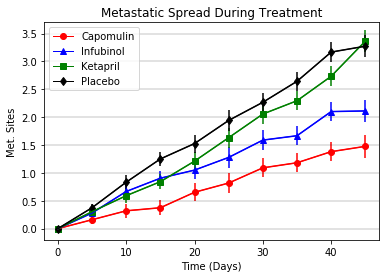

In [10]:
# Generate the Plot (with Error Bars)
# drugs of interest are Capomulin Infubinol Ketapril Placebo
x_axis = np.arange(0,46,5)
Capomulin_sites_axis = tumor_sites_mean_df_pivot['Metastatic Sites',
                                                 "Capomulin"].values
Infubinol_sites_axis = tumor_sites_mean_df_pivot['Metastatic Sites',
                                                 "Infubinol"].values
Ketapril_sites_axis = tumor_sites_mean_df_pivot['Metastatic Sites',
                                                "Ketapril"].values
Placebo_sites_axis = tumor_sites_mean_df_pivot['Metastatic Sites',
                                               "Placebo"].values

Capomulin_sites_handle, = plt.plot(x_axis, Capomulin_sites_axis, 
                                   marker="o",color="red", linewidth=1, 
                                   label="Capomulin")
Infubinol_sites_handle, = plt.plot(x_axis, Infubinol_sites_axis, 
                                   marker="^",color="blue", linewidth=1, 
                                   label="Infubinol")
Ketapril_sites_handle, = plt.plot(x_axis, Ketapril_sites_axis, 
                                  marker="s",color="green", linewidth=1, 
                                  label="Ketapril")
Placebo_sites_handle, = plt.plot(x_axis, Placebo_sites_axis, 
                                 marker="d",color="black", linewidth=1, 
                                 label="Placebo")

tumor_sites_std_err_df_pivot = pd.pivot_table(tumor_sites_std_err_df, 
                                           index=["Timepoint"], 
                                              columns=["Drug"])
Capomulin_sites_std_err = \
    tumor_sites_std_err_df_pivot['Metastatic Sites',"Capomulin"].values
Infubinol_sites_std_err = \
    tumor_sites_std_err_df_pivot['Metastatic Sites',"Capomulin"].values
Ketapril_sites_std_err = \
    tumor_sites_std_err_df_pivot['Metastatic Sites',"Capomulin"].values
Placebo_sites_std_err = \
    tumor_sites_std_err_df_pivot['Metastatic Sites',"Capomulin"].values

plt.errorbar(x_axis, Capomulin_sites_axis, Capomulin_sites_std_err, 
             color="red")
plt.errorbar(x_axis, Infubinol_sites_axis, Infubinol_sites_std_err, 
             color="blue")
plt.errorbar(x_axis, Ketapril_sites_axis, Ketapril_sites_std_err, 
             color="green")
plt.errorbar(x_axis, Placebo_sites_axis, Placebo_sites_std_err, 
             color="black")

plt.xlim(-2, 47)
plt.ylim(-0.2, 3.7)

hlines_step = np.arange(0, 3.7, .5)
plt.hlines(hlines_step, -2, 47, alpha=0.15)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.legend(handles=[Capomulin_vol_handle, Infubinol_vol_handle, 
                    Ketapril_vol_handle, Placebo_vol_handle], loc="best")

# Save the Figure
plt.savefig("images/Metatistic Spread During Treatment.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint 
# (W can pass any metric)
tumor_mouse_count = tumor_drug_timepoint_group["Mouse ID"].count()

# Convert to DataFrame
tumor_mouse_count_df = tumor_mouse_count.to_frame().reset_index()
tumor_mouse_count_df = \
    tumor_mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
tumor_mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mouse_count_df_pivot = pd.pivot_table(tumor_mouse_count_df, 
                                            index=["Timepoint"], 
                                            columns=["Drug"])

# Preview the Data Frame
tumor_mouse_count_df_pivot.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       24   
5                  25       21        25       23       23      24       23   
10                 25       20        21       22       21      24       21   
15                 24       19        21       19       21      20       15   
20                 23       18        20       19       20      19       15   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

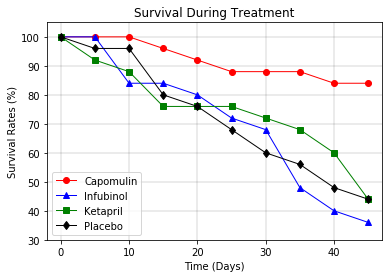

In [13]:
# Generate the Plot (Accounting for percentages)
# drugs of interest are Capomulin Infubinol Ketapril Placebo
x_axis = np.arange(0,46,5)
Capomulin_mouse_count_axis = \
    (100 * tumor_mouse_count_df_pivot['Mouse Count',"Capomulin"].values/ \
    tumor_mouse_count_df_pivot['Mouse Count', 'Capomulin'].max())
Infubinol_mouse_count_axis = \
    (100 * tumor_mouse_count_df_pivot['Mouse Count',"Infubinol"].values/ \
    tumor_mouse_count_df_pivot['Mouse Count', 'Infubinol'].max())
Ketapril_mouse_count_axis = \
    (100 * tumor_mouse_count_df_pivot['Mouse Count',"Ketapril"].values/ \
    tumor_mouse_count_df_pivot['Mouse Count', 'Ketapril'].max())
Placebo_mouse_count_axis = \
    (100 * tumor_mouse_count_df_pivot['Mouse Count',"Placebo"].values/ \
    tumor_mouse_count_df_pivot['Mouse Count', 'Placebo'].max())

Capomulin_mouse_count_handle, = plt.plot(x_axis, Capomulin_mouse_count_axis, 
                    marker="o",color="red", linewidth=1, label="Capomulin")
Infubinol_mouse_count_handle, = plt.plot(x_axis, Infubinol_mouse_count_axis, 
                    marker="^",color="blue", linewidth=1, label="Infubinol")
Ketapril_mouse_count_handle, = plt.plot(x_axis, Ketapril_mouse_count_axis, 
                    marker="s",color="green", linewidth=1, label="Ketapril")
Placebo_mouse_count_handle, = plt.plot(x_axis, Placebo_mouse_count_axis, 
                    marker="d",color="black", linewidth=1, label="Placebo")

plt.xlim(-2, 47)
plt.ylim(30, 105)

vlines = np.arange(0,46,10)
plt.vlines(vlines, 30, 105, alpha=0.10)
hlines_step = np.arange(40, 101, 10)
plt.hlines(hlines_step, -2, 47, alpha=0.10)


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.legend(handles=[Capomulin_vol_handle, Infubinol_vol_handle, 
                    Ketapril_vol_handle, Placebo_vol_handle], loc="best")

# Save the Figure
plt.savefig("images/Survival During Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
# looking at the starter results, this means the percent change in 
# tumor size from day 0 to day 45.  For Capomulin, this is 
# (36.23-45)/45 = (-)19.48
df = tumor_vol_mean_df_pivot.copy()
df.columns = df.columns.droplevel()
volume_change = 100 * (df.iloc[-1] - df.iloc[0]) / df.iloc[0]
volume_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# helper function for the bar graph to label the percentages of changes
def label_percentages(handle, pass_fail, ticks, sizes):
    for i in ticks:
        if pass_fail == "pass":
            handle.text(i-.75, -8, str(sizes[i])+ '%', color='white')
        else:
            handle.text(i-.75, +8, str(sizes[i-1])+ '%', color='white')

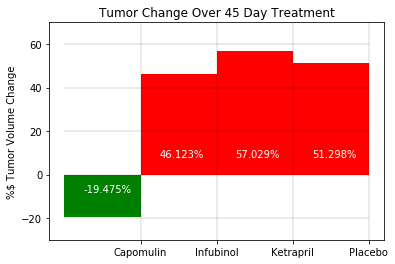

In [16]:
# Store all Relevant Percent Changes into a Tuple
vol_percent_data = [
    ('Capomulin', -19.475), ('Infubinol', 46.123), 
    ('Ketrapril', 57.029), ('Placebo', 51.298)
]

# Splice the data between passing and failing drugs
vol_percent_pass = [d for d in vol_percent_data if d[1] < 0 ]
vol_percent_fail = [d for d in vol_percent_data if d[1] >= 0 ]
vol_percent_sorted = vol_percent_pass + vol_percent_fail

drugs = [d[0] for d in vol_percent_sorted]
pass_drugs = [d[0] for d in vol_percent_pass]
pass_sizes = [d[1] for d in vol_percent_pass]
fail_drugs = [d[0] for d in vol_percent_fail]
fail_sizes = [d[1] for d in vol_percent_fail]
pass_drug_ticks = np.arange(len(pass_drugs))
fail_drug_ticks = np.arange(len(pass_drugs), 
                            (len(pass_drugs)+len(fail_drugs)))


# Orient widths. Add labels, tick marks, etc. 
pass_bar = plt.bar(pass_drug_ticks, pass_sizes, align='edge', 
                   color='g', width = -1)
fail_bar = plt.bar(fail_drug_ticks, fail_sizes, align='edge', 
                   color='r', width = -1)

x_ticks = np.arange(len(drugs)) 
plt.xticks(x_ticks, drugs)

plt.ylim(-30, 70)
plt.vlines(pass_drug_ticks, -30, 70, alpha=0.10)
plt.vlines(fail_drug_ticks, -30, 70, alpha=0.10)
hlines_step = np.arange(-20, 61, 20)
plt.hlines(hlines_step, -1, 
           (len(pass_drug_ticks) + len(pass_drug_ticks) + 1),
            alpha=0.10)


plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("%$ Tumor Volume Change")

# Use functions to label the percentages of changes
# --- see above label_percentages()

# Call functions to implement the function calls
label_percentages(plt, "pass", pass_drug_ticks, pass_sizes)
label_percentages(plt, "fail", fail_drug_ticks, fail_sizes)


# Save the Figure
plt.savefig("images/Tumor Change Over 45 Day Treatment.png")


# Show the Figure
plt.show()